In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('./SalesData/Sales_April_2019.csv')

In [5]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [ ]:

df = df.dropna(how='all')


print("Temizlik sonrası satır sayısı:", len(df))

Temizlik sonrası satır sayısı: 18324


In [ ]:

df = df[df['Order Date'] != 'Order Date']


print("Gizli başlıklar temizlendi. Yeni satır sayısı:", len(df))

Gizli başlıklar temizlendi. Yeni satır sayısı: 18289


In [ ]:

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])


df['Price Each'] = pd.to_numeric(df['Price Each'])


df['Order Date'] = pd.to_datetime(df['Order Date'])


print(df.info())

C:\Users\bugra\AppData\Local\Temp\ipykernel_13324\1522640289.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


<class 'pandas.core.frame.DataFrame'>
Index: 18289 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18289 non-null  object        
 1   Product           18289 non-null  object        
 2   Quantity Ordered  18289 non-null  int64         
 3   Price Each        18289 non-null  float64       
 4   Order Date        18289 non-null  datetime64[ns]
 5   Purchase Address  18289 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1000.2+ KB
None


In [ ]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

df['Month'] = df['Order Date'].dt.month

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [ ]:

def sehir_bul(adres):
    return adres.split(',')[1]  

df['City'] = df['Purchase Address'].apply(lambda x: sehir_bul(x))


df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles


In [ ]:

sehir_ciro = df.groupby('City')['Sales'].sum()

sehir_ciro_sirali = sehir_ciro.sort_values(ascending=False)

sehir_ciro_sirali

City
San Francisco    817074.77
Los Angeles      551399.07
New York City    446587.78
Boston           353880.16
Atlanta          284454.92
Seattle          276010.24
Dallas           252840.47
Portland         241128.11
Austin           172683.59
Name: Sales, dtype: float64

In [22]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,9


In [ ]:
df.groupby('Hour').count()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
Hour,,,,,,,,,
0,378,378,378,378,378,378,378,378,378
1,244,244,244,244,244,244,244,244,244
2,132,132,132,132,132,132,132,132,132
3,85,85,85,85,85,85,85,85,85
4,84,84,84,84,84,84,84,84,84
5,143,143,143,143,143,143,143,143,143
6,254,254,254,254,254,254,254,254,254
7,384,384,384,384,384,384,384,384,384
8,643,643,643,643,643,643,643,643,643


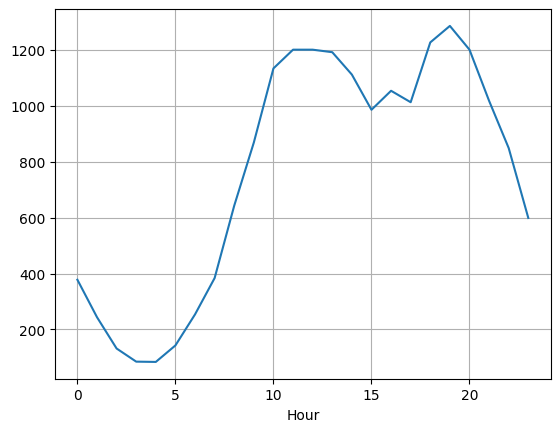

In [28]:

saatlik_satis = df.groupby('Hour').count()

saatlik_satis['Quantity Ordered'].plot()

import matplotlib.pyplot as plt
plt.grid()
plt.show()

In [2]:
import pandas as pd
import os


path = './SalesData' 


files = [file for file in os.listdir(path) if file.endswith('.csv')]


all_months_data = pd.DataFrame()


for file in files:
    
    file_path = path + "/" + file
    
    
    current_data = pd.read_csv(file_path)
    all_months_data = pd.concat([all_months_data, current_data])


all_months_data.to_csv("all_data.csv", index=False)


print(f"Birleştirilen dosya sayısı: {len(files)}")
print(f"Toplam Satır Sayısı: {len(all_months_data)}")
print("İlk 5 satır:")
all_months_data.head()

Birleştirilen dosya sayısı: 12
Toplam Satır Sayısı: 186850
İlk 5 satır:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:

all_data = all_months_data.copy()


all_data = all_data.dropna(how='all')


all_data = all_data[all_data['Order Date'] != 'Order Date']


all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Month'] = all_data['Order Date'].dt.month


def get_city(address):
    return address.split(',')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))


print("Temizlik Tamamlandı!")
all_data.head()

C:\Users\bugra\AppData\Local\Temp\ipykernel_2112\941307052.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


Temizlik Tamamlandı!


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles


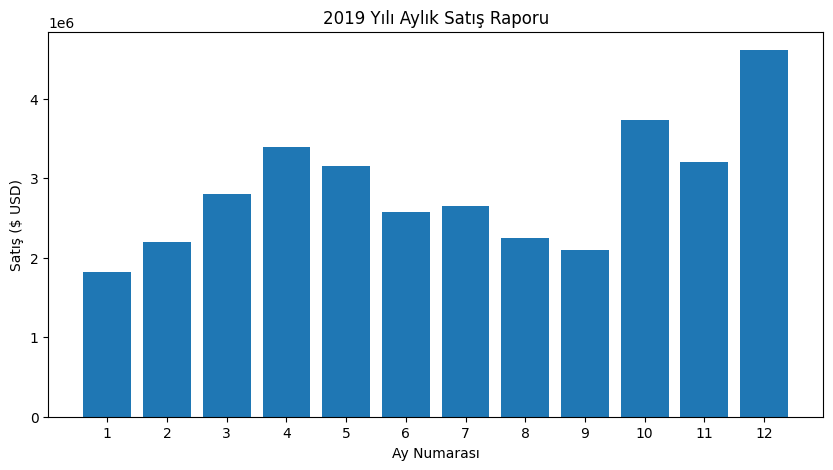

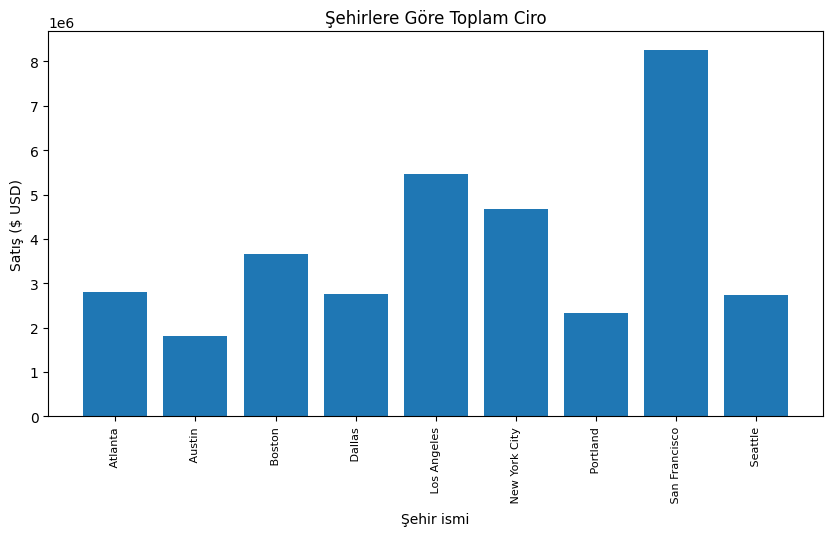

In [4]:
import matplotlib.pyplot as plt


results = all_data.groupby('Month').sum(numeric_only=True)
months = range(1, 13)

plt.figure(figsize=(10, 5)) 
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Satış ($ USD)')
plt.xlabel('Ay Numarası')
plt.title('2019 Yılı Aylık Satış Raporu')
plt.show()


city_results = all_data.groupby('City').sum(numeric_only=True)
cities = [city for city, df in all_data.groupby('City')]

plt.figure(figsize=(10, 5))
plt.bar(cities, city_results['Sales'])
plt.xticks(cities, rotation='vertical', size=8) 
plt.ylabel('Satış ($ USD)')
plt.xlabel('Şehir ismi')
plt.title('Şehirlere Göre Toplam Ciro')
plt.show()